<a href="https://colab.research.google.com/github/ahmetberahasanoglu/BasicDataAnalyse/blob/main/Odev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv("/Impact_of_Remote_Work_on_Mental_Health.csv")
data["Physical_Activity"]=data["Physical_Activity"].fillna("nodata")

# Yeni Bölüm

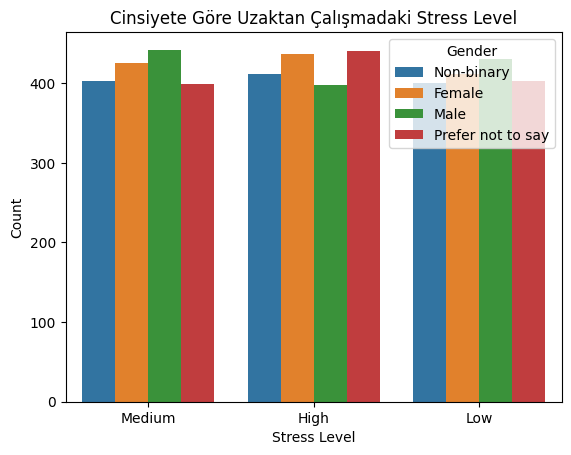

In [5]:
sns.countplot(data=data, x="Stress_Level", hue="Gender")
plt.title("Cinsiyete Göre Uzaktan Çalışmadaki Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

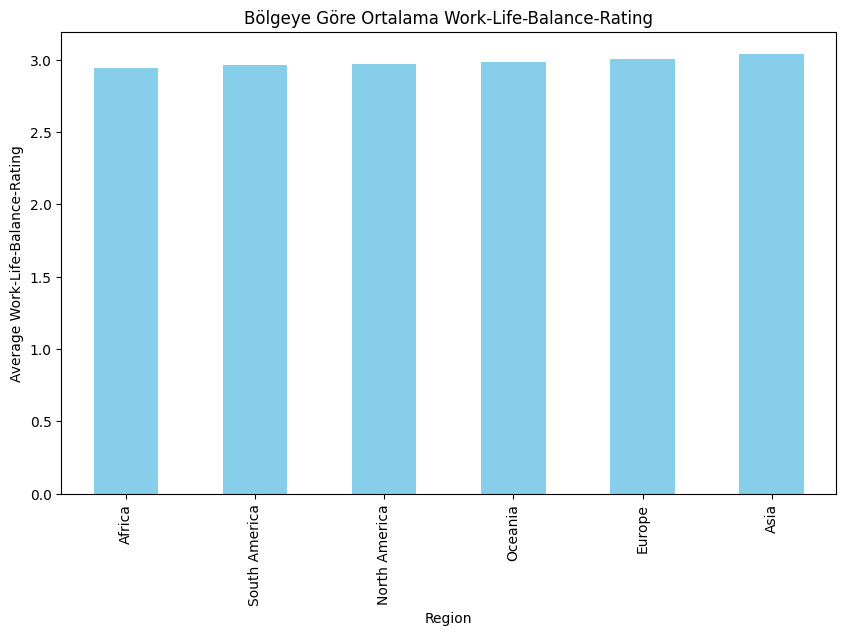

In [6]:
region_wlb = data.groupby("Region")["Work_Life_Balance_Rating"].mean().sort_values()

region_wlb.plot(kind="bar", color="skyblue", figsize=(10, 6))
plt.title("Bölgeye Göre Ortalama Work-Life-Balance-Rating")
plt.xlabel("Region")
plt.ylabel("Average Work-Life-Balance-Rating")
plt.show()

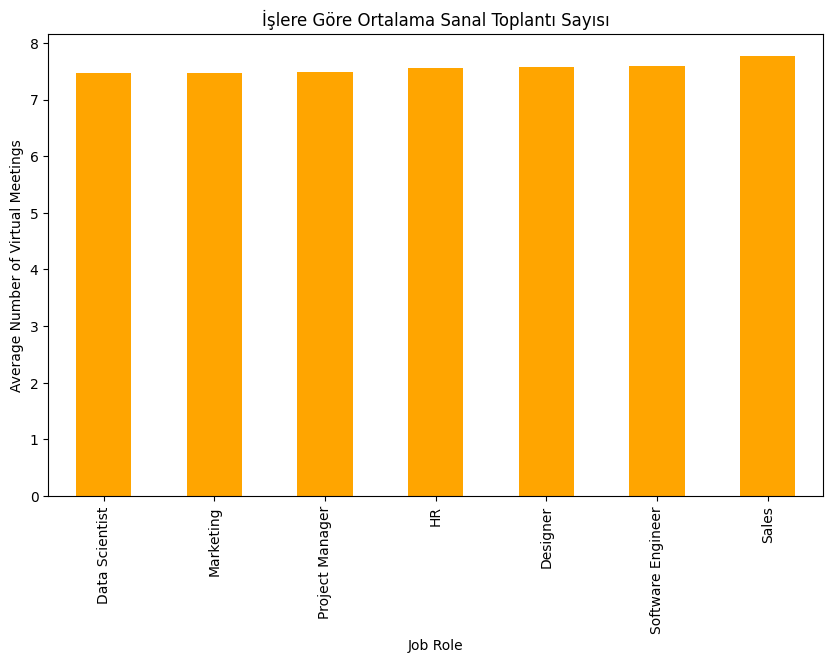

In [7]:
job_meetings = data.groupby("Job_Role")["Number_of_Virtual_Meetings"].mean().sort_values()

job_meetings.plot(kind="bar", color="orange", figsize=(10, 6))
plt.title("İşlere Göre Ortalama Sanal Toplantı Sayısı")
plt.xlabel("Job Role")
plt.ylabel("Average Number of Virtual Meetings")
plt.show()

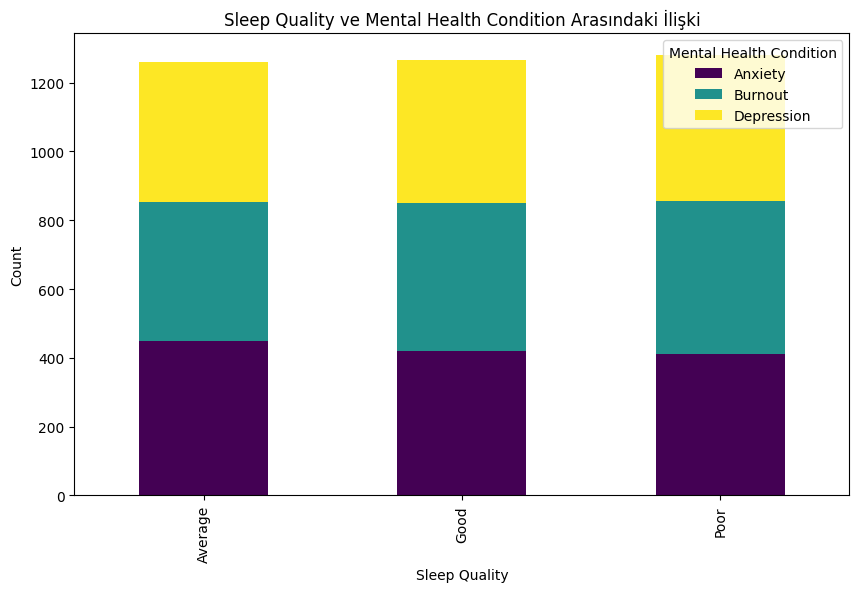

In [8]:
sleep_mental = pd.crosstab(data["Sleep_Quality"], data["Mental_Health_Condition"])

sleep_mental.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Sleep Quality ve Mental Health Condition Arasındaki İlişki")
plt.xlabel("Sleep Quality")
plt.ylabel("Count")
plt.legend(title="Mental Health Condition")
plt.show()

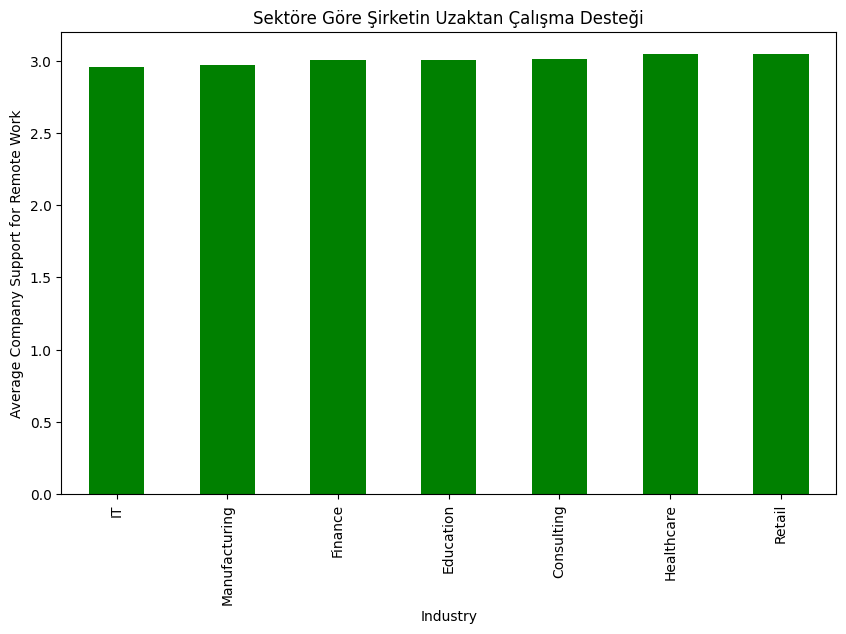

In [9]:
industry_support = data.groupby("Industry")["Company_Support_for_Remote_Work"].mean().sort_values()

industry_support.plot(kind="bar", color="green", figsize=(10, 6))
plt.title("Sektöre Göre Şirketin Uzaktan Çalışma Desteği")
plt.xlabel("Industry")
plt.ylabel("Average Company Support for Remote Work")
plt.show()

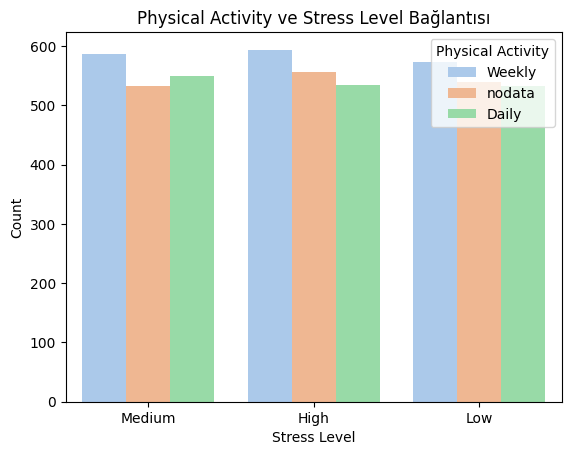

In [10]:
sns.countplot(data=data, x="Stress_Level", hue="Physical_Activity", palette="pastel")
plt.title("Physical Activity ve Stress Level Bağlantısı")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.legend(title="Physical Activity")
plt.show()


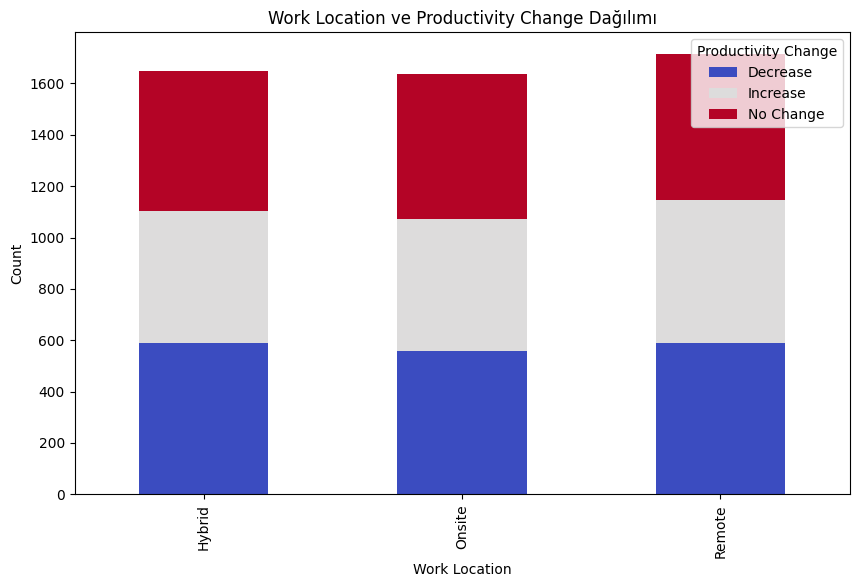

In [11]:
location_productivity = pd.crosstab(data["Work_Location"], data["Productivity_Change"])

location_productivity.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm")
plt.title("Work Location ve Productivity Change Dağılımı")
plt.xlabel("Work Location")
plt.ylabel("Count")
plt.legend(title="Productivity Change")
plt.show()

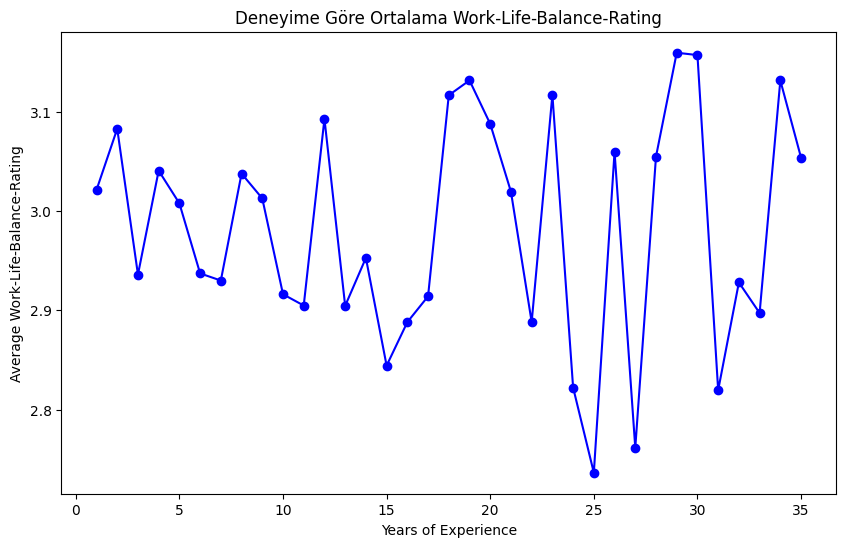

In [15]:
experience_wlb = data.groupby("Years_of_Experience")["Work_Life_Balance_Rating"].mean()

experience_wlb.plot(kind="line", marker="o", color="blue", figsize=(10, 6))
plt.title("Deneyime Göre Ortalama Work-Life-Balance-Rating")
plt.xlabel("Years of Experience")
plt.ylabel("Average Work-Life-Balance-Rating")
plt.show()

<ipython-input-14-802ad78ff4e2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Productivity_Change", y="Hours_Worked_Per_Week", palette="Set2")


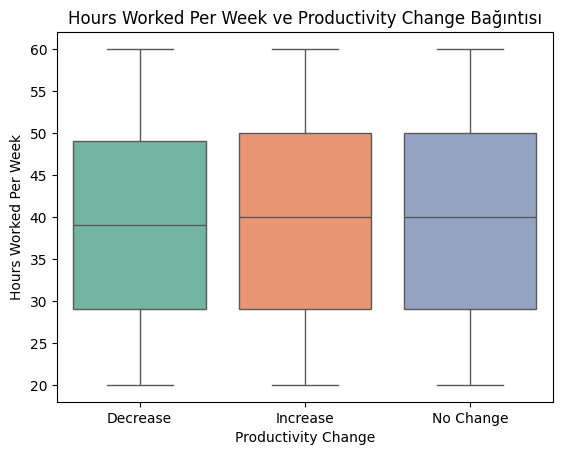

In [14]:
sns.boxplot(data=data, x="Productivity_Change", y="Hours_Worked_Per_Week", palette="Set2")
plt.title("Hours Worked Per Week ve Productivity Change Bağıntısı")
plt.xlabel("Productivity Change")
plt.ylabel("Hours Worked Per Week")
plt.show()

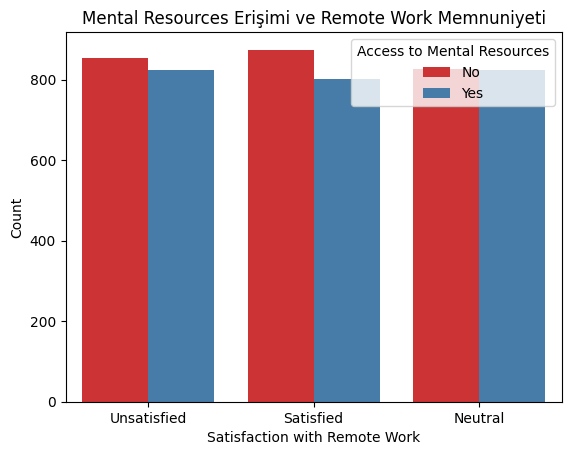

In [13]:
sns.countplot(data=data, x="Satisfaction_with_Remote_Work", hue="Access_to_Mental_Health_Resources", palette="Set1")
plt.title("Mental Resources Erişimi ve Remote Work Memnuniyeti")
plt.xlabel("Satisfaction with Remote Work")
plt.ylabel("Count")
plt.legend(title="Access to Mental Resources")
plt.show()